In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [43]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


## data preprocessing

In [44]:
data.shape

(7920, 3)

In [45]:
data.duplicated().sum()

np.int64(0)

In [46]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### text preprocessing

In [47]:
import re
import string

In [48]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

convert uppercase to lowercase

In [49]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [50]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove links

In [51]:
data['tweet']= data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [52]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

remove punctuation marks

In [53]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [54]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [55]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

remove numbers

In [56]:
data['tweet'].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [57]:
data['tweet'] = data['tweet'].str.replace('\d+', '', regex=True)

In [58]:
data['tweet'].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

remove stopwords

In [59]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [60]:
import nltk

In [61]:
nltk.download('stopwords', download_dir='../static/model/')

[nltk_data] Downloading package stopwords to ../static/model/...
[nltk_data]   Package stopwords is already up-to-date!


True

In [62]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [63]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [64]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [65]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

stemming

In [66]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [67]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [68]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

### vocabulary building 

In [69]:
from collections import Counter
vocab = Counter()

In [70]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [71]:
vocab, len(vocab)

(Counter({'iphon': 4073,
          'appl': 2876,
          'samsung': 1395,
          'new': 1137,
          'phone': 1015,
          'follow': 885,
          'soni': 819,
          '…': 751,
          'ipad': 537,
          'rt': 525,
          'love': 499,
          'like': 455,
          'day': 426,
          'app': 416,
          'life': 415,
          'android': 414,
          'photo': 394,
          'get': 382,
          'io': 382,
          'galaxi': 361,
          'instagram': 358,
          'case': 348,
          'beauti': 322,
          'cute': 322,
          'gain': 311,
          'today': 309,
          'work': 306,
          'im': 294,
          'back': 294,
          'fuck': 293,
          'happi': 293,
          'photographi': 292,
          'game': 282,
          'got': 280,
          'fun': 277,
          'news': 265,
          'thank': 263,
          'music': 263,
          'time': 248,
          'make': 247,
          'updat': 236,
          'smile': 231,
          '

In [72]:
tokens = [key for key in vocab if vocab[key] > 10]

In [73]:
tokens, len(tokens)

(['test',
  'android',
  'app',
  'beauti',
  'cute',
  'health',
  'iger',
  'iphoneonli',
  'iphonesia',
  'iphon',
  'final',
  'case',
  'thank',
  'yay',
  'soni',
  'xperia',
  'love',
  'would',
  'go',
  'talk',
  'relax',
  'smartphon',
  'wifi',
  'connect',
  'im',
  'know',
  'made',
  'way',
  'home',
  'amaz',
  'servic',
  'appl',
  'wont',
  'even',
  'question',
  'pay',
  'stupid',
  'support',
  'softwar',
  'updat',
  'fuck',
  'phone',
  'big',
  'time',
  'happi',
  'us',
  'instap',
  'instadaili',
  'xperiaz',
  'new',
  'type',
  'c',
  'charger',
  'cabl',
  'uk',
  '…',
  'amazon',
  'year',
  'newyear',
  'start',
  'technolog',
  'samsunggalaxi',
  'iphonex',
  'shop',
  'listen',
  'music',
  'likeforlik',
  'photo',
  'fun',
  'selfi',
  'water',
  'camera',
  'picoftheday',
  'sun',
  'instagood',
  'boy',
  'outdoor',
  'hey',
  'make',
  'ipod',
  'dont',
  'color',
  'inch',
  'crash',
  'everi',
  'need',
  'realli',
  'drop',
  'ball',
  'design',
 

In [74]:
def save_vocabulary(lines, fileName):
    data = '\n'.join(lines)
    file = open(fileName, 'w', encoding='utf-8')

    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### divide dataset

In [75]:
x = data['tweet']
y = data['label']

In [76]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

In [78]:
X_train.shape, X_test.shape

((6336,), (1584,))

### vectorization

In [79]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)  # Only append after processing the sentence

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)
    return vectorized_list_new


In [80]:
vectorized_X_train = vectorizer(X_train, tokens)
vectorized_X_test = vectorizer(X_test, tokens)

In [81]:
Y_train.value_counts()

label
0    4693
1    1643
Name: count, dtype: int64

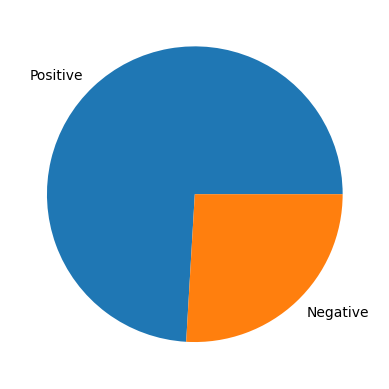

In [82]:
plt.pie(np.array([Y_train.value_counts()[0], Y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### handle imbalanced dataset

In [83]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [84]:
Y_train

1977    0
7343    0
7081    0
4661    1
1660    0
       ..
2635    0
5921    0
3001    0
1834    0
6203    0
Name: label, Length: 6336, dtype: int64

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print(X_train_vec.shape, X_test_vec.shape)  # Check the shape of the vectorized data


(6336, 13268) (1584, 13268)


In [86]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, Y_train_smote = smote.fit_resample(vectorized_X_train, Y_train)
print(vectorized_X_train_smote.shape, Y_train_smote.shape)


(9386, 1145) (9386,)


In [87]:
Y_train_smote.value_counts()

label
0    4693
1    4693
Name: count, dtype: int64

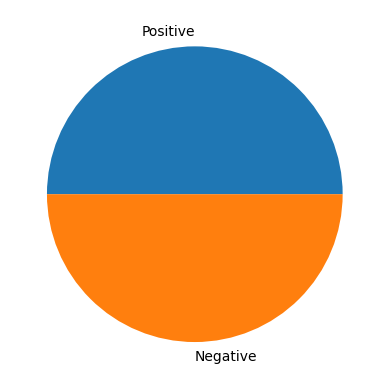

In [88]:
plt.pie(np.array([Y_train_smote.value_counts()[0], Y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [89]:
vectorized_X_train_smote

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(9386, 1145), dtype=float32)

In [90]:
Y_train_smote

0       0
1       0
2       0
3       1
4       0
       ..
9381    1
9382    1
9383    1
9384    1
9385    1
Name: label, Length: 9386, dtype: int64

In [91]:
vectorized_X_test 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

## model training and evaluation

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [94]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_score(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    
    print(f'Training score: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-score = {f1}')

def validation_score(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    
    print(f'Testing score: \n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-score = {f1}')

### logistic regression 

In [108]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_pred = lr.predict(vectorized_X_train_smote)
Y_test_pred = lr.predict(vectorized_X_test)

training_score(Y_train_smote, Y_train_pred)
validation_score(Y_test, Y_test_pred)

Training score: 
	Accuracy = 0.941
	Precision = 0.916
	Recall = 0.971
	F1-score = 0.943
Testing score: 
	Accuracy = 0.881
	Precision = 0.715
	Recall = 0.846
	F1-score = 0.775


### naive bayes

In [109]:
mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_pred = mnb.predict(vectorized_X_train_smote)
Y_test_pred = mnb.predict(vectorized_X_test)

training_score(Y_train_smote, Y_train_pred)
validation_score(Y_test, Y_test_pred)


Training score: 
	Accuracy = 0.903
	Precision = 0.866
	Recall = 0.954
	F1-score = 0.908
Testing score: 
	Accuracy = 0.877
	Precision = 0.68
	Recall = 0.927
	F1-score = 0.785


### decision tree

In [110]:
dt = DecisionTreeClassifier()
dt.fit(vectorized_X_train_smote, Y_train_smote)

Y_train_pred = mnb.predict(vectorized_X_train_smote)
Y_test_pred = mnb.predict(vectorized_X_test)

training_score(Y_train_smote, Y_train_pred)
validation_score(Y_test, Y_test_pred)


Training score: 
	Accuracy = 0.903
	Precision = 0.866
	Recall = 0.954
	F1-score = 0.908
Testing score: 
	Accuracy = 0.877
	Precision = 0.68
	Recall = 0.927
	F1-score = 0.785


### random forest

In [111]:
rfc = RandomForestClassifier()
rfc.fit(vectorized_X_train_smote, Y_train_smote)


Y_train_pred = mnb.predict(vectorized_X_train_smote)
Y_test_pred = mnb.predict(vectorized_X_test)

training_score(Y_train_smote, Y_train_pred)
validation_score(Y_test, Y_test_pred)

Training score: 
	Accuracy = 0.903
	Precision = 0.866
	Recall = 0.954
	F1-score = 0.908
Testing score: 
	Accuracy = 0.877
	Precision = 0.68
	Recall = 0.927
	F1-score = 0.785


### support vector

In [112]:
sv = SVC()
sv.fit(vectorized_X_train_smote, Y_train_smote)


Y_train_pred = mnb.predict(vectorized_X_train_smote)
Y_test_pred = mnb.predict(vectorized_X_test)

training_score(Y_train_smote, Y_train_pred)
validation_score(Y_test, Y_test_pred)

Training score: 
	Accuracy = 0.903
	Precision = 0.866
	Recall = 0.954
	F1-score = 0.908
Testing score: 
	Accuracy = 0.877
	Precision = 0.68
	Recall = 0.927
	F1-score = 0.785


In [113]:
import pickle
with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)